# Overview
This is a report on what I've been playing with the past few weeks. Basically I'm investigate to what 
extent one can delense the polarization to estimate primordial B-mode fluctuations. The end-goal is to see to what
extent we can estimate $r$ from modes that are dominated by lensing power (to essentially push-down cosmic variance).

We will focus on three topics
1. **Analyze the difference between forward lensing and delensing lensing.** 
2. **Analyze a new lensing/delensing method of Blake Sherwin.**
3. **Apply a MLE estimate of delensing, already applied to the CMB T, to the problem of polarization using Blake's delensing method.** 

# Topic 1: Forward lensing, delensing and antilensing
Let $Q(x)$ and $U(x)$ denote the Stokes parameters for the unlensed CMB polarization. The lensed polarization
will be denoted $\widetilde Q(x)$ and $\widetilde U(x)$ and have the form 
\begin{align*}
\widetilde Q(x) &:= Q(x+\nabla \phi(x)) \\
\widetilde U(x) &:= U(x+\nabla \phi(x)) \\
\end{align*}
where $\phi$ is the lensing potential. The above operation I'm calling **forward lensing**.

It turns out that delensing can not be computed by switching the sign on $\phi$. In particular
\begin{align*}
Q(x) &\neq  \widetilde  Q(x-\nabla \phi(x)) \\
U(x) &\neq  \widetilde  U(x-\nabla \phi(x)).
\end{align*}
Actually, the right hand side is a very good approximation to the unlensed $Q(x)$ and $U(x)$ but it is worth 
while to be clear about why the approximation isn't exact. 
Let $f(x):=x + \nabla \phi(x)$ denote the lensing map. Then the delensing operation is 
given by 
\begin{align*}
Q(x) & =  \widetilde  Q(x-\nabla \phi(f^{-1}(x))) \\
U(x) & =  \widetilde  U(x-\nabla \phi(f^{-1}(x))).
\end{align*}
This implies that the delensing lensing displacement is modeled as a warped version of the curl-free vector field $-\nabla \phi$ (warped by $f^{-1}$).  
This warping introduces a non-zero divergence-free term (just as lensing adds non-zero B-mode power in the CMB polarization). 
Now, by decomposing $-\nabla \phi(f^{-1}(x))$ into curl-free and divergence-free potentials, $\phi^{del}$ and $\psi^{del}$, we 
get the following **delensing** operation
\begin{align*}
Q(x) & =   \widetilde  Q(x+ \nabla \phi^{del}(x) + \nabla^\perp \psi^{del}(x)) \\
U(x) & =   \widetilde  U(x+ \nabla \phi^{del}(x) + \nabla^\perp \psi^{del}(x))
\end{align*}
where $\nabla^\perp:=(\nabla_2,-\nabla_1)$.

## The full data model 

I'll eventually try to estimate the delensing map. Since this will include incorperating the estimates of a 
rotational potential, I'm going to just include an additional rotational potential in the forward lense model (which I think
is physical in the sense that actual lensing produces a field rotation but it is quite small compared to the curl-free potential).

So, here is **forward lensing**
\begin{align*}
\widetilde Q(x) &= Q(x+\nabla \phi(x) + \nabla^\perp \psi(x)) \\
\widetilde U(x) &= U(x+\nabla \phi(x)+ \nabla^\perp \psi(x)).
\end{align*}
The **delensing** operation is written
\begin{align*}
Q(x) &= \widetilde  Q(x+\nabla \phi^{del}(x) + \nabla^\perp \psi^{del}(x)) \\
U(x) &= \widetilde  U(x+\nabla \phi^{del}(x) + \nabla^\perp \psi^{del}(x)).
\end{align*}
I will call the following approximation **antilensing**
\begin{align*}
Q(x) &\approx \widetilde  Q(x-\nabla \phi(x) - \nabla^\perp \psi(x)) \\
U(x) &\approx \widetilde  U(x-\nabla \phi(x) - \nabla^\perp \psi(x)).
\end{align*}

##  The difference between $\phi, \psi$ and $\phi^{del}, \psi^{del}$
We will look at this difference in simulations. First we need some preliminaries.

In [1]:
srcpath  =  "/Users/ethananderes/Dropbox/BLimit/src/"
savepath =  "/Users/ethananderes/Dropbox/BLimit/paper/"

include(srcpath * "Interp.jl")
include(srcpath * "fft.jl")
include(srcpath * "funcs.jl")
using PyPlot, Interp

INFO: Loading help data...


### Define parameters of the simulation run. Note that `streammultiplier` sets the magnitude of $C_l^{\psi\psi}$

In [2]:
const streammultiplier  = 0.01  # C_l^{ψψ} is 1% of C_l^{ϕϕ}
const r = 0.15
const pixel_size_arcmin = 0.5
const n = 2^9 # number of pixels to a side.

512

### Generate the pixel and Fourier grid.

In [3]:
const d = 2
const deltx   = pixel_size_arcmin * π / (180 * 60) #this is in radians
const period  = deltx * n
const deltk   = 2π / period  
const dk      = deltk ^ d
const dx      = deltx ^ d
const nyq     = 2π / (2deltx)
const x, y    = meshgrid([0:n-1] * deltx, [0:n-1] * deltx)
const k1, k2  = linspace(-nyq, nyq-deltk, int(n))  |> fftshift |> x->meshgrid(x,x)
const magk    = √(k1.^2 .+ k2.^2)
const φ2_l    = 2.0 * angle(k1 + im * k2)

# we also need a higher resolution grid for lensing
const nhr        = 4 * n
const deltxhr    = (1/4) * deltx
const periodhr   = deltxhr * nhr
const deltkhr    = 2π / periodhr  
const dkhr       = deltkhr ^ 2
const dxhr       = deltxhr ^ 2
const nyqhr      = 2π / (2deltxhr)
const xhr, yhr   = meshgrid([0:nhr-1] * deltxhr, [0:nhr-1] * deltxhr)
const k1hr, k2hr = linspace(-nyqhr, nyqhr-deltkhr, int(nhr))  |> fftshift |> x->meshgrid(x,x)
const magkhr     = sqrt(k1hr.^2 .+ k2hr.^2)
const φ2_lhr    = 2.0 * angle(k1hr + im * k2hr)

2048x2048 Array{Float64,2}:
  0.0       0.0       0.0        0.0       …   6.28319   6.28319   6.28319
  3.14159   1.5708    0.927295   0.643501      5.63968   5.35589   4.71239
  3.14159   2.2143    1.5708     1.17601       5.10718   4.71239   4.06889
  3.14159   2.49809   1.96559    1.5708        4.71239   4.3176    3.78509
  3.14159   2.65164   2.2143     1.85459       4.42859   4.06889   3.63155
  3.14159   2.7468    2.38058    2.06075   …   4.22243   3.90261   3.53638
  3.14159   2.8113    2.49809    2.2143        4.06889   3.78509   3.47189
  3.14159   2.8578    2.58499    2.33181       3.95138   3.69819   3.42539
  3.14159   2.89288   2.65164    2.42405       3.85913   3.63155   3.3903 
  3.14159   2.92028   2.70425    2.49809       3.78509   3.57893   3.36291
  3.14159   2.94226   2.7468     2.55868   …   3.72451   3.53638   3.34093
  3.14159   2.96027   2.78189    2.60909       3.6741    3.5013    3.32291
  3.14159   2.97531   2.8113     2.65164       3.63155   3.47189   3.307

### Use Classy to define the CMB Spectra. 

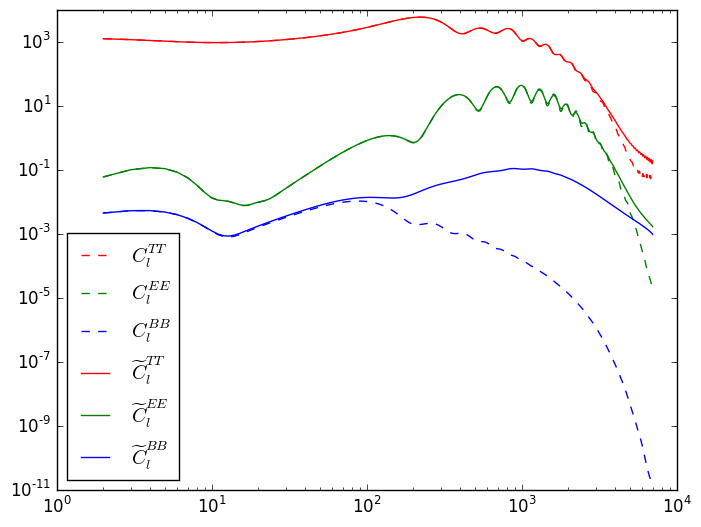

PyObject <matplotlib.legend.Legend object at 0x117be88d0>

In [4]:
using PyCall
@pyimport classy

cosmo = classy.Class()
cosmo[:struct_cleanup]() # important when running in a loop over different cosmologies
cosmo[:empty]() # important if you completely change cosmology
params = [
    "output"        => "tCl, pCl, lCl",
    "modes"         => "s,t",
    "lensing"       => "yes",
    "T_cmb"         => 2.726, # Kelvin units, subsequent scaling depends on this   
    "l_max_scalars" => 7_500,
    "l_max_tensors" => 7_500,
    "A_s"           => 2.3e-9,
    "n_s"           => 0.9624, 
    "h"             => 0.6711,
    "omega_b"       => 0.022068,
    "omega_cdm"     => 0.12029,
    "r"             => r ]
cosmo[:set](params)
cosmo[:compute]()

cls_ln = cosmo[:lensed_cl](7_000)
cls_ln["tt"] = cls_ln["tt"] * (10^6 * cosmo[:T_cmb]()) ^ 2 
cls_ln["ee"] = cls_ln["ee"] * (10^6 * cosmo[:T_cmb]()) ^ 2 
cls_ln["bb"] = cls_ln["bb"] * (10^6 * cosmo[:T_cmb]()) ^ 2 
cls_ln["te"] = cls_ln["te"] * (10^6 * cosmo[:T_cmb]()) ^ 2 
cls_ln["tp"] = cls_ln["tp"] * (10^6 * cosmo[:T_cmb]()) 

cls = cosmo[:raw_cl](7_000)
cls["tt"] = cls["tt"] * (10^6 * cosmo[:T_cmb]()) ^ 2 
cls["ee"] = cls["ee"] * (10^6 * cosmo[:T_cmb]()) ^ 2 
cls["bb"] = cls["bb"] * (10^6 * cosmo[:T_cmb]()) ^ 2 
cls["te"] = cls["te"] * (10^6 * cosmo[:T_cmb]()) ^ 2 
cls["tp"] = cls["tp"] * (10^6 * cosmo[:T_cmb]()) 

cls["ps"] = streammultiplier * cls["pp"]

loglog(cls["ell"] .* (cls["ell"] + 1) .* cls["tt"] / 2π, "r--", label = L"C_l^{TT}")
loglog(cls["ell"] .* (cls["ell"] + 1) .* cls["ee"] / 2π, "g--", label = L"C_l^{EE}")
loglog(cls["ell"] .* (cls["ell"] + 1) .* cls["bb"] / 2π, "b--", label = L"C_l^{BB}")

loglog(cls_ln["ell"] .* (cls_ln["ell"] + 1) .* cls_ln["tt"] / 2π, "r-", label = L"\widetilde C_l^{TT}")
loglog(cls_ln["ell"] .* (cls_ln["ell"] + 1) .* cls_ln["ee"] / 2π, "g-", label = L"\widetilde C_l^{EE}")
loglog(cls_ln["ell"] .* (cls_ln["ell"] + 1) .* cls_ln["bb"] / 2π, "b-", label = L"\widetilde C_l^{BB}")
legend(loc = "best")

###  Now  make a very high resolution forward lens

In [5]:
dispxhr, dispyhr, ϕxhr, ψxhr, ϕhr, ψhr, xhr, yhr, ϕx, ψx = let
	# make the spectral matrices
	index  = ceil(magkhr)
	index[find(index.==0)] = 1

	logCPh = linear_interp1(cls["ell"], log(cls["pp"]), index)
	logCPh[find(logCPh .== 0)]  = -Inf
	logCPh[find(isnan(logCPh))] = -Inf
	cPh = exp(logCPh)
	
	logCPs = linear_interp1(cls["ell"], log(cls["ps"]), index)
	logCPs[find(logCPs .== 0)]  = -Inf
	logCPs[find(isnan(logCPs))] = -Inf
	cPs = exp(logCPs)

	ϕhr    =  √(cPh) .* fft2(randn(size(xhr))./ √(dxhr), deltxhr) 
	ψhr    =  √(cPs) .* fft2(randn(size(xhr))./ √(dxhr), deltxhr) 

    ϕtx     = ifft2r(ϕhr, deltkhr)[1:4:end, 1:4:end]
	ψtx     = ifft2r(ψhr, deltkhr)[1:4:end, 1:4:end]

	dispxhr   = ifft2r(im .* k1hr .* ϕhr, deltkhr)  + ifft2r(im .* k2hr .* ψhr, deltkhr)
	dispyhr   = ifft2r(im .* k2hr .* ϕhr, deltkhr)  - ifft2r(im .* k1hr .* ψhr, deltkhr)
	
	dispxhr, dispyhr, ifft2r(ϕhr, deltkhr),  ifft2r(ψhr, deltkhr), ϕhr, ψhr, xhr, yhr, ϕtx, ψtx # this gets returned
end
ϕ = fft2(ϕx)
ψ = fft2(ψx);

### Now construct the inverse lensing displacement

In [6]:
using PyCall
@pyimport scipy.interpolate as scii
function griddata(x::Matrix, y::Matrix, z::Matrix, xi::Matrix,yi::Matrix)
	xpd, ypd = Interp.perodic_padd_xy(x, y, 0.1)
	zpd = Interp.perodic_padd_z(z, 0.1)
	points = [xpd[:] ypd[:]]
	# grid = (vec(xi[1,:]), vec(yi[:,1]))
	grid = (xi, yi)
	zi = scii.griddata(points, zpd[:], grid, method = "cubic")
end
lensex = xhr + dispxhr
lensey = yhr + dispyhr
antix_dsp = griddata(lensex, lensey, -dispxhr, x, y)
antiy_dsp = griddata(lensex, lensey, -dispyhr, x, y)

function helmholtz(ax::Matrix, bx::Matrix)
	# (ax,bx) is the vector field defined in pixel space
	ak, bk = fft2(ax), fft2(bx)
	divk = squash!( (k1 .* ak + k2 .* bk) ./ (im * (k1.^2 + k2.^2)) )
	crlk = squash!( (ak - im .* k1 .* divk) ./ (im * k2) )
	divk[magk .<= 0.0] = 0.0
	crlk[magk .<= 0.0] = 0.0
	divx, crlx = ifft2r(divk), ifft2r(crlk)
	divx, divk, crlx, crlk
end
ϕdelx, ϕdel, ψdelx, ψdel = helmholtz(antix_dsp, antiy_dsp);


### Plot  $\phi, \psi$ and $\phi^{del}, \psi^{del}$

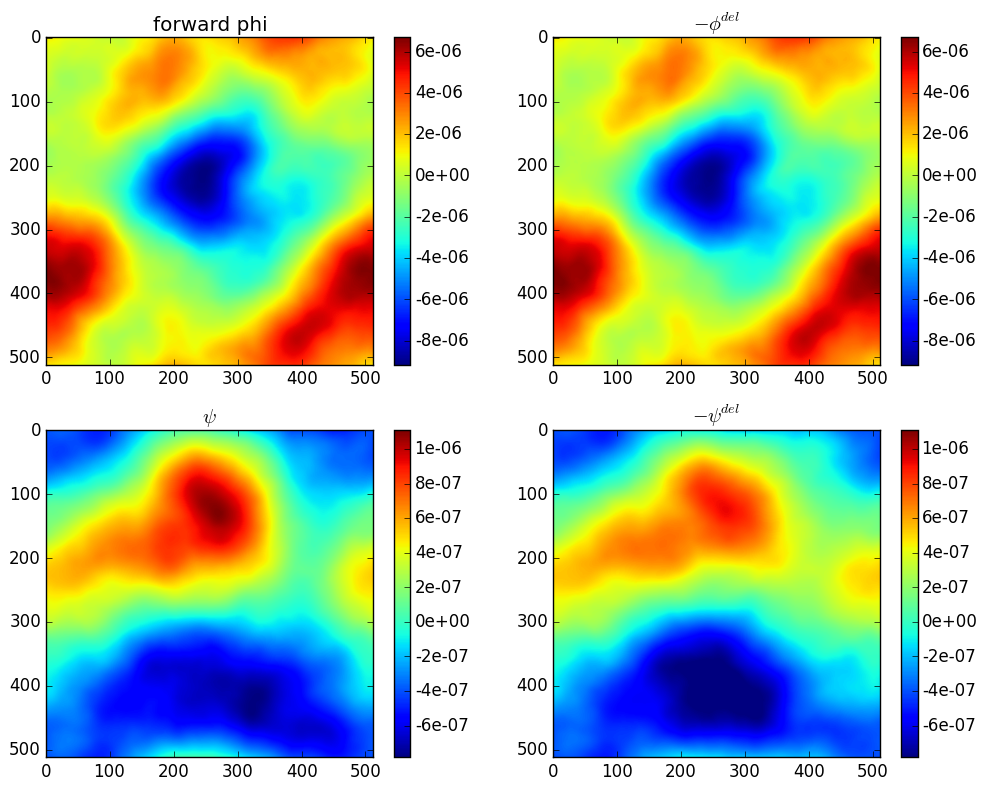

PyObject <matplotlib.colorbar.Colorbar instance at 0x142792f80>

In [8]:
figure(figsize = (12,9))
subplot(2,2,1)
imshow(ϕx);
title("forward phi");colorbar(format="%.e")
subplot(2,2,2)
imshow(-ϕdelx, vmin = minimum(ϕx), vmax = maximum(ϕx));
title(L"-\phi^{del}");colorbar(format="%.e")
subplot(2,2,3)
imshow(ψx);title(L"\psi");colorbar(format="%.e")
subplot(2,2,4)
imshow(-ψdelx, vmin = minimum(ψx), vmax = maximum(ψx));
title(L"-\psi^{del}");
colorbar(format="%.e")


### Compare the spectral power of $\phi^{del}, \psi^{del}$ with $\phi, \psi$
Notice that the warping should introduce a small amount of non-Gaussianity in $\phi^{del}, \psi^{del}$. 
Let's check to see if we can use $C_l^{\phi\phi}$ and $C_l^{\psi\psi}$ to at least approximate the spectral density
of $\phi^{del}, \psi^{del}$.

/Users/ethananderes/Software/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


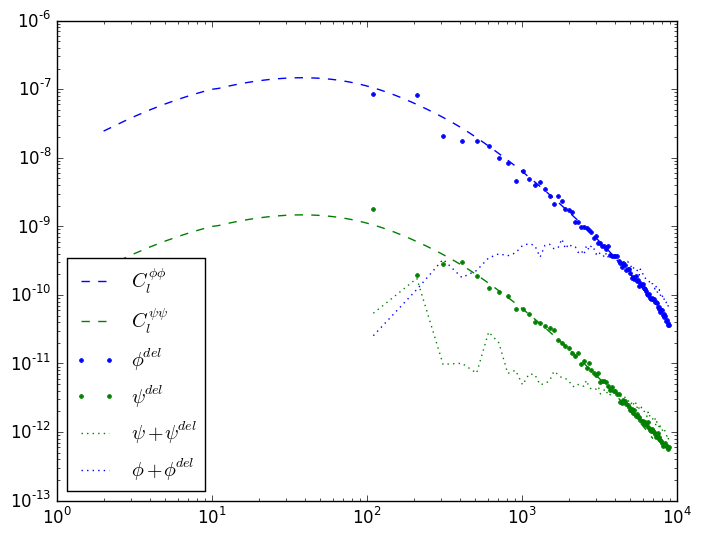

PyObject <matplotlib.legend.Legend object at 0x14991e850>

In [9]:
loglog(cls["ell"], (cls["ell"].^4) .*  cls["pp"] / (2π), "b--", label = L"C_l^{\phi\phi}")
loglog(cls["ell"], (cls["ell"].^4) .*  cls["ps"] / (2π), "g--", label = L"C_l^{\psi\psi}")

loglog(110:100:9000, binave((magk .^ 4) .* abs2(fft2(ϕdelx*deltk)) / (2π), magk, 110:100:9000), "b.", label = L"\phi^{del}")
loglog(110:100:9000, binave((magk .^ 4) .* abs2(fft2(ψdelx*deltk)) / (2π), magk, 110:100:9000), "g.", label = L"\psi^{del}")
loglog(110:100:9000, binave((magk .^ 4) .* abs2(fft2(ψx*deltk + ψdelx*deltk)) / (2π), magk, 110:100:9000), "g:", label = L" \psi + \psi^{del} ")
loglog(110:100:9000, binave((magk .^ 4) .* abs2(fft2(ϕx*deltk+ϕdelx*deltk))    / (2π), magk, 110:100:9000), "b:", label = L" \phi + \phi^{del} ")

legend(loc = "best")

The above plots looks pretty good. There is some added power at high frequency, which is consistent with 
what happens when lensing the CMB, but the difference seems small. Moreover, I'm guessing it would be easy to 
derive the true spectral densities of $\phi^{del}, \psi^{del}$ in the same way the lensed CMB spectra are calculated.

### Compare $\phi^{del}, \psi^{del}$ with $\phi, \psi$ in terms of the response of primordial B to lensing.
In particular, lets look at two different versions of $\widetilde B_k$, one lensed with  $\phi, \psi$ and one lensed with $\phi^{del}, \psi^{del}$.
This is relevant to the situation where one has an estimate of $\phi$ and $\psi$ and tries to use it to antilense the B mode.

We first need a high resolution unlensed Q and U simulation

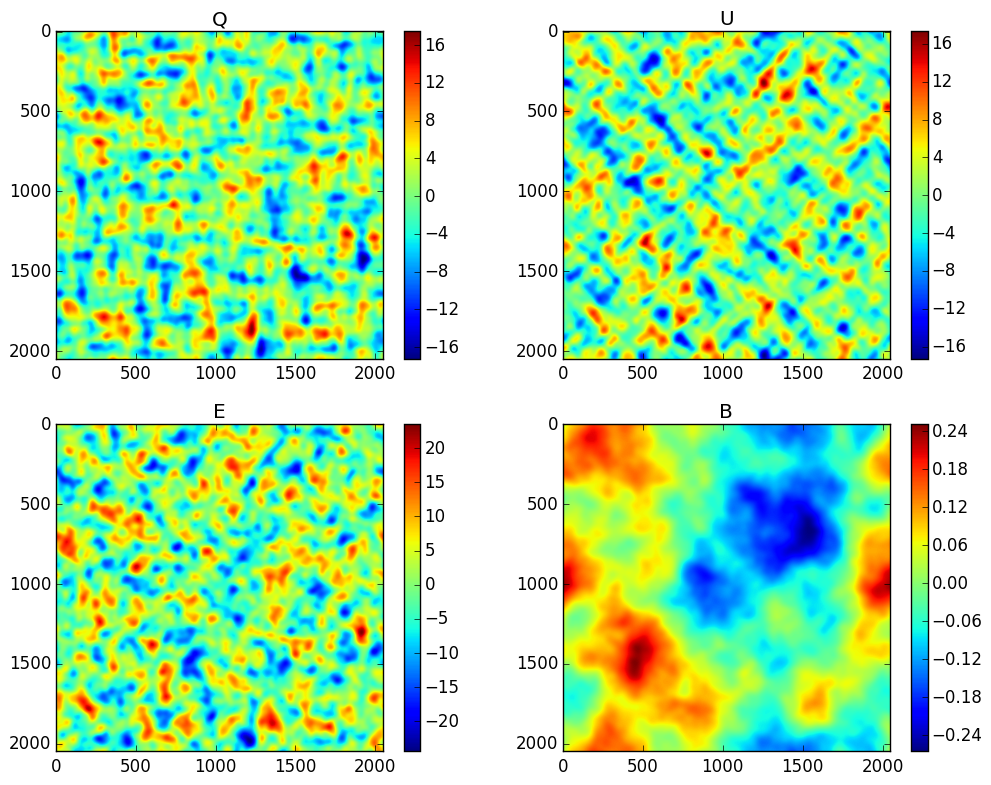

PyObject <matplotlib.text.Text object at 0x1271385d0>

In [11]:
Qhrx, Uhrx = let
	# make the spectral matrices
	index  = ceil(magkhr)
	index[find(index.==0)] = 1

	logCBB = linear_interp1(cls["ell"],log(cls["bb"]), index)
	logCBB[find(logCBB .== 0)]  = -Inf 
	logCBB[find(isnan(logCBB))] = -Inf
	cBBhr = exp(logCBB);
	
	logCEE = linear_interp1(cls["ell"],log(cls["ee"]), index)
	logCEE[find(logCEE .== 0)]  = -Inf  
	logCEE[find(isnan(logCEE))] = -Inf
	cEEhr = exp(logCEE)

    E    =  √(cEEhr) .* fft2(randn(size(xhr))./ √(dxhr), deltxhr) 
	B    =  √(cBBhr) .* fft2(randn(size(xhr))./ √(dxhr), deltxhr)  
	Q    = - E .* cos(φ2_lhr) + B .* sin(φ2_lhr)
	U    = - E .* sin(φ2_lhr) - B .* cos(φ2_lhr)
	Qhrx   = ifft2r(Q, deltkhr)
	Uhrx   = ifft2r(U, deltkhr)
	
    Qhrx, Uhrx
end # let
Ehrx    = - fft2(Qhrx, deltxhr) .* cos(φ2_lhr) - fft2(Uhrx, deltxhr) .* sin(φ2_lhr)  |> x->ifft2r(x, deltkhr)
Bhrx    =   fft2(Qhrx, deltxhr) .* sin(φ2_lhr) - fft2(Uhrx, deltxhr) .* cos(φ2_lhr)  |> x->ifft2r(x, deltkhr)
figure(figsize = (12,9))
subplot(2,2,1)
imshow(Qhrx);colorbar();title("Q")
subplot(2,2,2)
imshow(Uhrx);colorbar();title("U")
subplot(2,2,3)
imshow(Ehrx);colorbar();title("E")
subplot(2,2,4)
imshow(Bhrx);colorbar();title("B")

### Now we lense Q, U using forward lense and delense

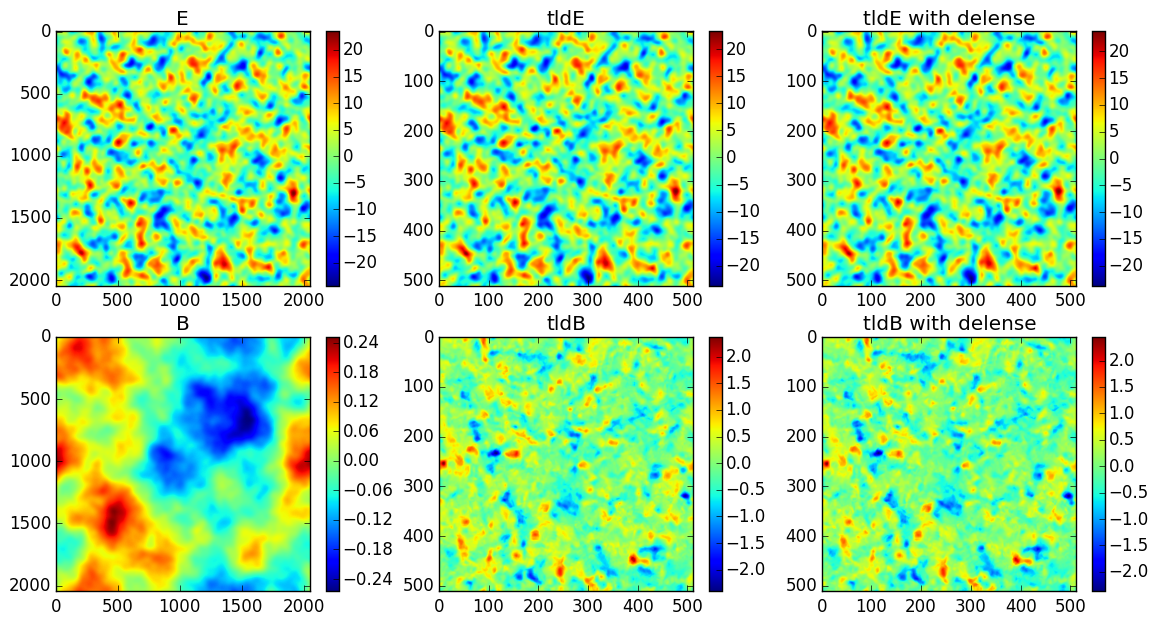

PyObject <matplotlib.text.Text object at 0x13f2c6510>

In [13]:
dispx   = ifft2r(im .* k1 .* ϕ, deltk)  + ifft2r(im .* k2 .* ψ, deltk)
dispy   = ifft2r(im .* k2 .* ϕ, deltk)  - ifft2r(im .* k1 .* ψ, deltk)
dispxinv   = ifft2r(im .* k1 .* -ϕdel, deltk)  + ifft2r(im .* k2 .* -ψdel, deltk)
dispyinv   = ifft2r(im .* k2 .* -ϕdel, deltk)  - ifft2r(im .* k1 .* -ψdel, deltk)

tldQx    = spline_interp2(xhr, yhr, Qhrx, x +  dispx, y +  dispy)
tldUx    = spline_interp2(xhr, yhr, Uhrx, x +  dispx, y +  dispy)
tldQxinv = spline_interp2(xhr, yhr, Qhrx, x +  dispxinv, y +  dispyinv)
tldUxinv = spline_interp2(xhr, yhr, Uhrx, x +  dispxinv, y +  dispyinv)

tldEx = - fft2(tldQx) .* cos(φ2_l) - fft2(tldUx) .* sin(φ2_l) |> ifft2r
tldBx =   fft2(tldQx) .* sin(φ2_l) - fft2(tldUx) .* cos(φ2_l) |> ifft2r
tldExinv = - fft2(tldQxinv) .* cos(φ2_l) - fft2(tldUxinv) .* sin(φ2_l) |> ifft2r
tldBxinv =   fft2(tldQxinv) .* sin(φ2_l) - fft2(tldUxinv) .* cos(φ2_l) |> ifft2r
figure(figsize = (14,7))
subplot(2,3,1)
imshow(Ehrx);colorbar();title("E")
subplot(2,3,2)
imshow(tldEx);colorbar();title("tldE")
subplot(2,3,3)
imshow(tldExinv);colorbar();title("tldE with delense")
subplot(2,3,4)
imshow(Bhrx);colorbar();title("B")
subplot(2,3,5)
imshow(tldBx);colorbar();title("tldB")
subplot(2,3,6)
imshow(tldBxinv);colorbar();title("tldB with delense")

### Let's look at the spectral power of the above lensed fields

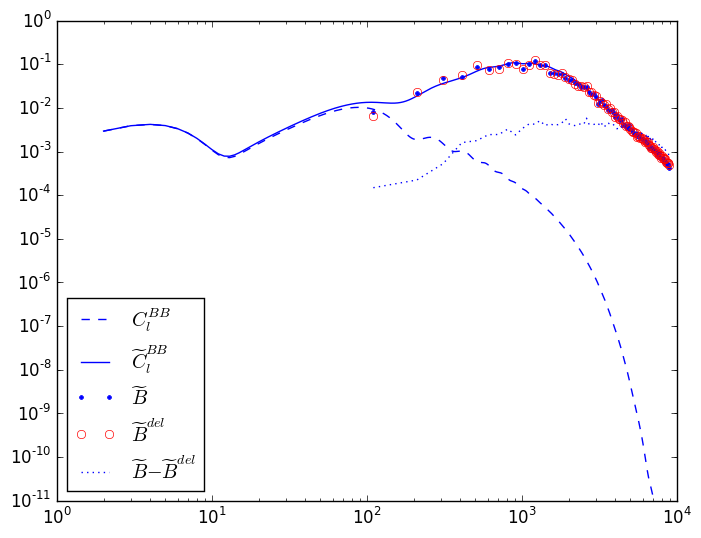

PyObject <matplotlib.legend.Legend object at 0x14fdc0a90>

In [14]:
loglog((cls["ell"].^2) .* cls["bb"] / 2π, "b--", label = L"C_l^{BB}")
loglog((cls_ln["ell"].^2) .* cls_ln["bb"] / 2π, "b-", label = L"\widetilde C_l^{BB}")
loglog(110:100:9000, binave((magk .^ 2) .* abs2(fft2(tldBx*deltk)) / (2π), magk, 110:100:9000), "b.", label = L"\widetilde B")
loglog(110:100:9000, binave((magk .^ 2) .* abs2(fft2(tldBxinv*deltk)) / (2π), magk, 110:100:9000), "o", markeredgecolor = "red",  mfc="none", label = L"\widetilde B^{del}")
loglog(110:100:9000, binave((magk .^ 2) .* abs2(fft2(tldBx*deltk - tldBxinv*deltk)) / (2π), magk, 110:100:9000), "b:", label = L"\widetilde B-\widetilde B^{del}")
legend(loc = "best")

So it looks like both $\phi,\psi$ and $\phi^{del}, \psi^{del}$ produce about the same lensing power but a 
fairly large pointwise difference. 

# Topic 2: New lensing/delensing method of Blake Sherwin

The standard way to simulate lensing is computationally difficult. It involves simulation a very high resolution
$Qhr(x)$. Then the value of $\widetilde Q(x)$ is approximated by interpolating $Qhr$ at the spatial location $x+\nabla\phi(x)+\nabla\psi(x)$.

Blake's method is to decompose the lensing operation $x-> x+d(x)$ into a grid re-organization and a sub-gridscale displacement. 
The advantage is that one does not need to simulation a higher resolution field for interpolation.

To describe the method set
\begin{equation}
d(x) := \nabla\phi(x) + \nabla^\perp\psi(x).
\end{equation}
Notice that a regular taylor appoximation does not work very well for the CMB
\begin{equation}
Q(x+d(x)) \not\approx Q(x) + \nabla Q(x)\cdot d(x).
\end{equation}
A way around this is to  decompose $d(x)$ into a quantized function which maps grid-to-grid and a residual
\begin{equation}
d(x) = d_{grid}(x) + d_{res}(x) 
\end{equation}
where $d_{grid}(x)$ effectively rounds $d(x)$ so that $x+d_{grid}(x)$ is exactly on the grid.
Now the Taylor approximation with $d_{res}(x)$ is actually quite good
\begin{align*}
Q(x+d(x))  &= Q(x+ d_{grid}(x) + d_{res}(x)) \\
 &\approx Q(x+ d_{grid}(x)) + \nabla Q(x+ d_{grid}(x))\cdot d_{res}(x).
\end{align*}
Notice that $ Q(x+ d_{grid}(x))$ and $\nabla Q(x+ d_{grid}(x))$ can be computed by re-shuffling the original resolution pixel values.
 

### Lensed B mode from Blakes method

In [16]:
# downsample the high resolution QU to the data grid
unlensedQUdata = QUandFriends(fft2(Qhrx[1:4:end,1:4:end]), fft2(Uhrx[1:4:end,1:4:end]))
# compute d(x)
displx   = ifft2r(im .* k1 .* ϕ) + ifft2r(im .* k2 .* ψ)
disply   = ifft2r(im .* k2 .* ϕ) - ifft2r(im .* k1 .* ψ);+

Decompose the lensing displacements

In [17]:
row, col = size(x)
rdisplx  = Array(Float64, row, col)
rdisply  = Array(Float64, row, col)
indcol   = Array(Int64, row, col)
indrow   = Array(Int64, row, col)
decomplense!(indcol, indrow, rdisplx, rdisply, x, y, displx, disply, deltx)

### plot of subgrid displacements

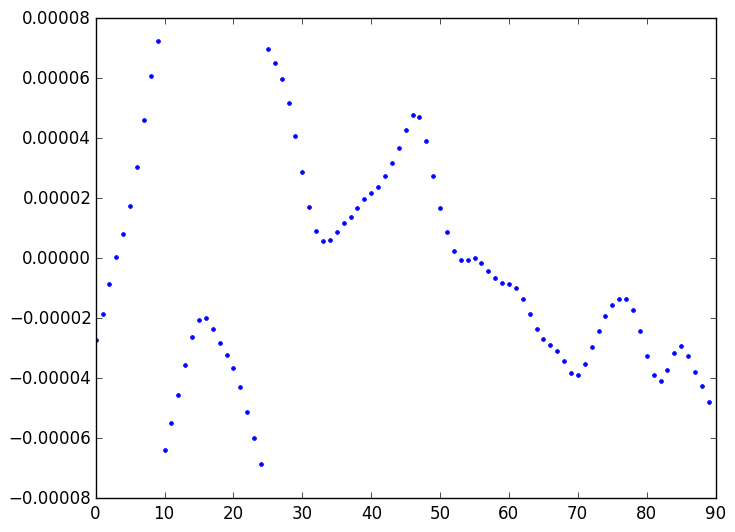

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x149bddd90>

In [22]:
plot(rdisplx[1:90,150],".")

### Here is a heatmap of the subgrid x displacements

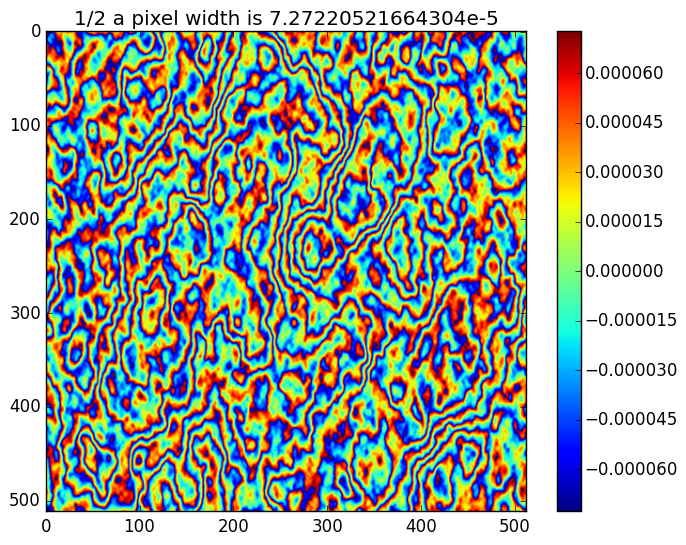

PyObject <matplotlib.colorbar.Colorbar instance at 0x14bab56c8>

In [23]:
imshow(rdisplx)
title("1/2 a pixel width is $(deltx/2)")
colorbar()

### Now lense

In [24]:
# do the integer lensing
lQUdata = gridlense(unlensedQUdata, indcol, indrow)

# do the taylor expansion lensing and put everything in a QU object
tldQx  = lQUdata.Qx 
tldQx += (lQUdata.∂1Qx .* rdisplx) 
tldQx += (lQUdata.∂2Qx .* rdisply)
tldQx += 0.5 * (rdisplx .* lQUdata.∂11Qx .* rdisplx ) 
tldQx +=       (rdisplx .* lQUdata.∂12Qx .* rdisply ) 
tldQx += 0.5 * (rdisply .* lQUdata.∂22Qx .* rdisply ) 

tldUx  = lQUdata.Ux 
tldUx += (lQUdata.∂1Ux .* rdisplx) 
tldUx += (lQUdata.∂2Ux .* rdisply)
tldUx += 0.5 * (rdisplx .* lQUdata.∂11Ux .* rdisplx ) 
tldUx +=       (rdisplx .* lQUdata.∂12Ux .* rdisply ) 
tldUx += 0.5 * (rdisply .* lQUdata.∂22Ux .* rdisply ) 

tldQUdata = QUandFriends(tldQx, tldUx)
unlensedQUdata, lQUdata, tldQUdata,  ϕ, ψ

# convert to E, B
Ex    = - fft2(unlensedQUdata.Qx)    .* cos(φ2_l) - fft2(unlensedQUdata.Ux)    .* sin(φ2_l)  |> ifft2r
Bx    =   fft2(unlensedQUdata.Qx)    .* sin(φ2_l) - fft2(unlensedQUdata.Ux)    .* cos(φ2_l)  |> ifft2r
lEx   = - fft2(lQUdata.Qx)   .* cos(φ2_l) - fft2(lQUdata.Ux)   .* sin(φ2_l) |> ifft2r
lBx   =   fft2(lQUdata.Qx)   .* sin(φ2_l) - fft2(lQUdata.Ux)   .* cos(φ2_l) |> ifft2r
tldExBlake = - fft2(tldQUdata.Qx) .* cos(φ2_l) - fft2(tldQUdata.Ux) .* sin(φ2_l) |> ifft2r
tldBxBlake =   fft2(tldQUdata.Qx) .* sin(φ2_l) - fft2(tldQUdata.Ux) .* cos(φ2_l) |> ifft2r;

### This shows the difference between unlensed B, integer lensed B and integer + 2nd taylor lensed B

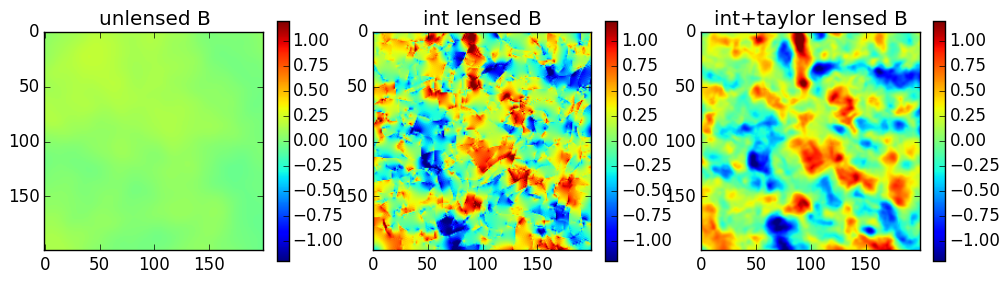

In [25]:
figure(figsize = (12, 3))
subplot(1,3,1)
imshow(Bx[1:200,1:200]); title("unlensed B"); clim(-1.2, 1.2); colorbar(); 
subplot(1,3,2)
imshow(lBx[1:200,1:200]); title("int lensed B"); clim(-1.2, 1.2); colorbar(); 
subplot(1,3,3)
imshow(tldBxBlake[1:200,1:200]); title("int+taylor lensed B"); clim(-1.2, 1.2); colorbar();

### Now lets look at the lensed B-mode response to all order lensing contrasted with Blakes method. Notice the error is much smaller than the difference between delensing and forward lensing

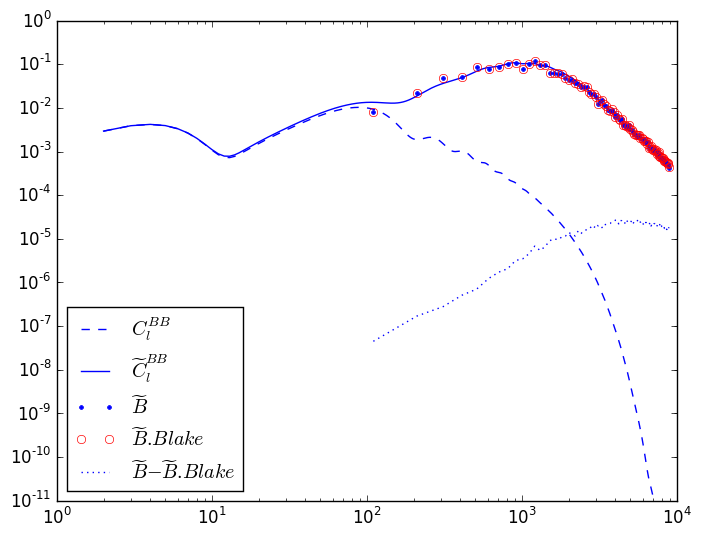

PyObject <matplotlib.legend.Legend object at 0x154326ad0>

In [27]:
loglog((cls["ell"].^2) .* cls["bb"] / 2π, "b--", label = L"C_l^{BB}")
loglog((cls_ln["ell"].^2) .* cls_ln["bb"] / 2π, "b-", label = L"\widetilde C_l^{BB}")
loglog(110:100:9000, binave((magk .^ 2) .* abs2(fft2(tldBx*deltk)) / (2π), magk, 110:100:9000), "b.", label = L"\widetilde B")
loglog(110:100:9000, binave((magk .^ 2) .* abs2(fft2(tldBxBlake*deltk)) / (2π), magk, 110:100:9000), "o", markeredgecolor = "red",  mfc="none", label = L"\widetilde B.Blake")
loglog(110:100:9000, binave((magk .^ 2) .* abs2(fft2(tldBxBlake*deltk - tldBx*deltk)) / (2π), magk, 110:100:9000), "b:", label = L"\widetilde B-\widetilde B.Blake")
legend(loc = "best")

# Topic 3: MLE estimate of delensing

# Gradient updates

In [29]:
const cEE, cBB, cPh, cPs = let
	index  = ceil(magk)
	index[find(index.==0)] = 1
	
	logCPh = linear_interp1(cls["ell"], log(cls["pp"]), index)
	logCPh[find(logCPh .== 0)]  = -Inf
	logCPh[find(isnan(logCPh))] = -Inf
	cPh = exp(logCPh)
	
	logCPs = linear_interp1(cls["ell"], log(cls["ps"]), index)
	logCPs[find(logCPs .== 0)]  = -Inf
	logCPs[find(isnan(logCPs))] = -Inf
	cPs = exp(logCPs)
	
	logCBB = linear_interp1(cls["ell"],log(cls["bb"]), index)
	logCBB[find(logCBB .== 0)]  = -Inf 
	logCBB[find(isnan(logCBB))] = -Inf
	cBB = exp(logCBB);
	
	logCEE = linear_interp1(cls["ell"],log(cls["ee"]), index)
	logCEE[find(logCEE .== 0)]  = -Inf  
	logCEE[find(isnan(logCEE))] = -Inf
	cEE = exp(logCEE)

	cEE, cBB, cPh, cPs
end

const maskupC = 1500
const maskupP = 3000  # l_max for for phi
const Mq  = squash!(- abs2(cos(φ2_l)) ./ cEE  - abs2(sin(φ2_l)) ./ cBB ) 
const Mu  = squash!(- abs2(cos(φ2_l)) ./ cBB  - abs2(sin(φ2_l)) ./ cEE )
const Mqu = squash!(2 * cos(φ2_l) .* sin(φ2_l) ./ cBB) - squash!(2 * cos(φ2_l) .* sin(φ2_l) ./ cEE) 

Mq[magk .>= maskupC]  = 0.0 
Mu[magk .>= maskupC]  = 0.0 
Mqu[magk .>= maskupC] = 0.0 

ϕcurr = zero(ϕ)
ψcurr = zero(ψ)
println("the number of lensing parameters are $(2*sum(magk.<=maskupP))")

the number of lensing parameters are 7970


In [30]:
@time gradupdate!(ϕcurr, ψcurr, tldQUdata, 10_000, 3e-6, 3e-6)

loglike => -435647.8494521214
loglike => -401267.52123544493
loglike => -371878.9587820358
loglike => -346362.18569583865
loglike => -322339.9160768568
loglike => -301905.32984528714
loglike => -284098.3039531813
loglike => -268041.1783955058
loglike => -253685.49854211582
loglike => -240584.23373679817
loglike => -229038.7822601075
loglike => -218843.26873728159
loglike => -209700.70838549768
loglike => -200925.52917061248
loglike => -193081.1183387787
loglike => -185660.59316695444
loglike => -178860.24614159518
loglike => -172963.53432822897
loglike => -167655.99282643938
loglike => -162768.64411578557
loglike => -158184.78947109752
loglike => -153875.8604891931
loglike => -149879.6791103862
loglike => -146134.33555068946
loglike => -142598.8582303736
loglike => -139262.99337708388
loglike => -136106.6113067748
loglike => -133147.9325157482
loglike => -130372.31909413688
loglike => -127752.8759487903
loglike => -125246.64706937216
loglike => -122842.5235556393
loglike => -120544.537

### here are the estimates  

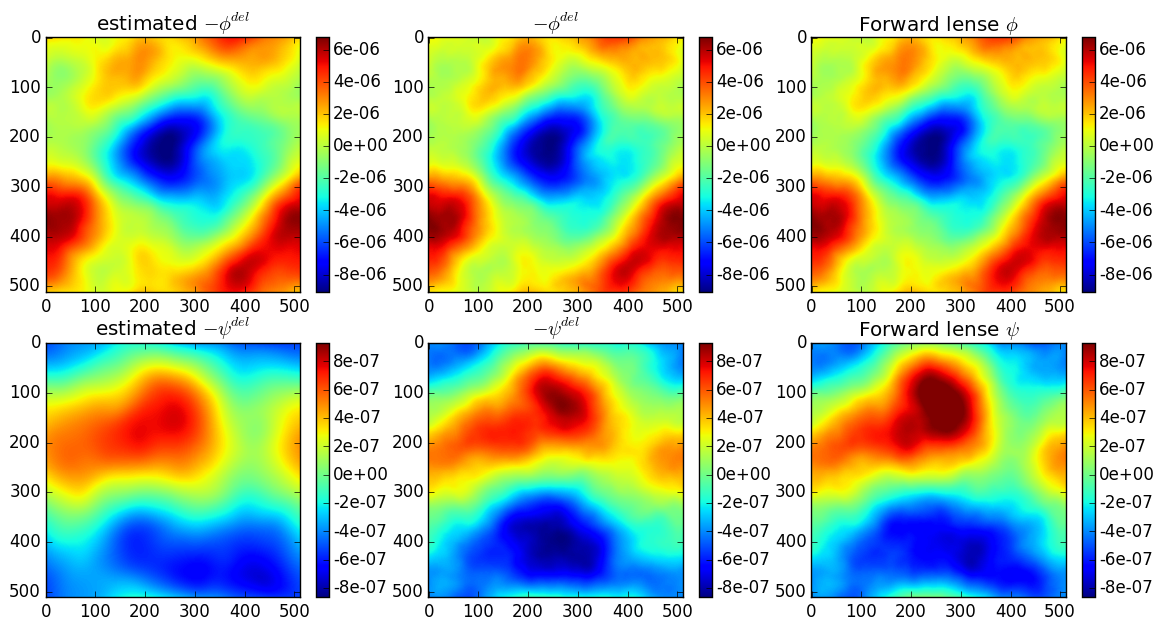

PyObject <matplotlib.text.Text object at 0x1780dfe10>

In [38]:
figure(figsize = (14,7))
subplot(2,3,2)
	imshow(-ϕdelx, 
  		interpolation = "nearest", 
vmin=minimum(-ϕdelx),
vmax=maximum(-ϕdelx), 
	) 
title(L"-\phi^{del}")
	colorbar(format="%.e")
subplot(2,3,1)
	ϕcurrₓ = ifft2r(ϕcurr)
	imshow(
		ϕcurrₓ, 
  		interpolation = "nearest", 
vmin=minimum(-ϕdelx),
vmax=maximum(-ϕdelx), 
	) 
    colorbar(format="%.e")
title(L"estimated $-\phi^{del}$")
subplot(2,3,3)
	imshow(
		ϕx, 
  		interpolation = "nearest", 
vmin=minimum(-ϕdelx),
vmax=maximum(-ϕdelx), 
	) 
title(L"Forward lense $\phi$")
	colorbar(format="%.e")
subplot(2,3,5)
	imshow(
-ψdelx, 
  		interpolation = "nearest", 
vmin=minimum(-ψdelx),
vmax=maximum(-ψdelx), 
	) 
	colorbar(format="%.e")
title(L"-\psi^{del}")
subplot(2,3,4)
	ψcurrₓ = ifft2r(ψcurr)
	imshow(
		ψcurrₓ, 
  		interpolation = "nearest", 
vmin=minimum(-ψdelx),
vmax=maximum(-ψdelx), 
	) 
colorbar(format="%.e")
title(L"estimated $-\psi^{del}$")
subplot(2,3,6)
	imshow(
		ψx, 
  		interpolation = "nearest", 
vmin=minimum(-ψdelx),
vmax=maximum(-ψdelx), 
	) 
	colorbar(format="%.e")
title(L"Forward lense $\psi$")


## Lets check the delensed spectral density of lensed B

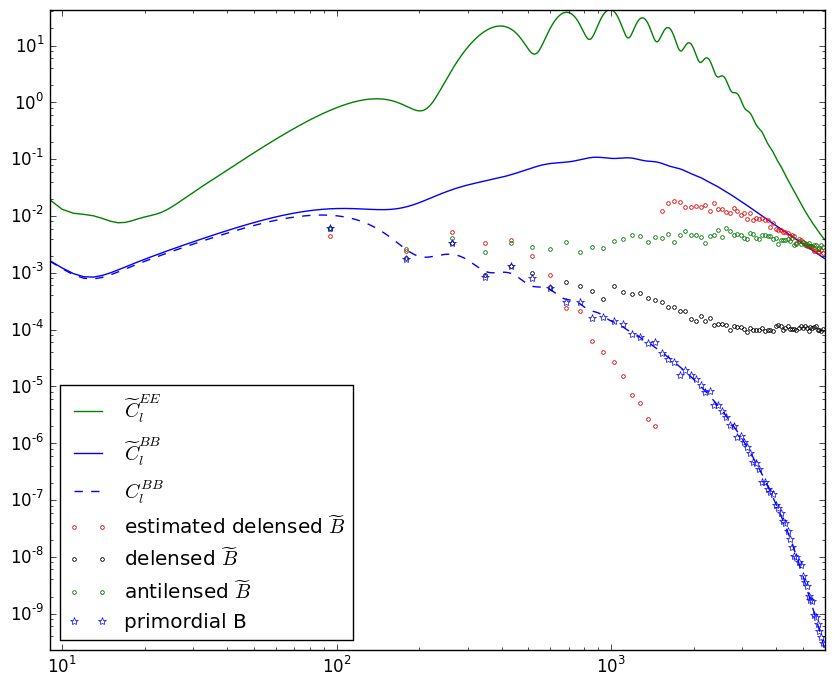

PyObject <matplotlib.legend.Legend object at 0x1852618d0>

In [42]:
Qϕψxest, Uϕψxest, _, _, _, _    = easylense(tldQUdata, -ϕcurr, -ψcurr) 
Qϕψxdel, Uϕψxdel, _, _, _, _    = easylense(tldQUdata, fft2(ϕdelx), fft2(ψdelx)) 
Qϕψxanti, Uϕψxanti, _, _, _, _    = easylense(tldQUdata, -ϕ, -ψ) 
est_B        =   fft2(Qϕψxest) .* sin(φ2_l) - fft2(Uϕψxest) .* cos(φ2_l) 
est_B_del   =   fft2(Qϕψxdel) .* sin(φ2_l) - fft2(Uϕψxdel) .* cos(φ2_l) 
est_B_anti   =   fft2(Qϕψxanti) .* sin(φ2_l) - fft2(Uϕψxanti) .* cos(φ2_l) 
tldB         =   fft2(tldBx)

uplim = 6000
llim = 10
figure(figsize = (10,8))
loglog(cls["ell"][llim:uplim], cls["ell"][llim:uplim] .* (cls["ell"][llim:uplim] + 1) .* cls_ln["ee"][llim:uplim]  / (2π), "g-", label = L"\widetilde C_l^{EE}")
# loglog(cls["ell"][llim:uplim], cls["ell"][llim:uplim] .* (cls["ell"][llim:uplim] + 1) .* cls["ee"][llim:uplim]  / (2π), "g--", label = L" C_l^{EE}")
loglog(cls["ell"][llim:uplim], cls["ell"][llim:uplim] .* (cls["ell"][llim:uplim] + 1) .* cls_ln["bb"][llim:uplim]  / (2π), "b-", label = L"\widetilde C_l^{BB}")
loglog(cls["ell"][llim:uplim], cls["ell"][llim:uplim] .* (cls["ell"][llim:uplim] + 1) .* cls["bb"][llim:uplim]  / (2π), "b--", label = L"C_l^{BB}")

# loglog(llim:deltk:uplim, binave(magk .* (magk + 1) .* abs2(tldB*deltk) / (2π), magk, llim:deltk:uplim), "b.", label = L"tldB")
loglog(llim:deltk:uplim, binave(magk .* (magk + 1) .* abs2(est_B*deltk) /(2π), magk, llim:deltk:uplim), ".", markeredgecolor = "red",  mfc="none", label = L"estimated delensed $\widetilde B$")
loglog(llim:deltk:uplim, binave(magk .* (magk + 1) .* abs2(est_B_del*deltk) /(2π), magk, llim:deltk:uplim), ".", markeredgecolor = "black",  mfc="none", label = L"delensed $\widetilde B$")
loglog(llim:deltk:uplim, binave(magk .* (magk + 1) .* abs2(est_B_anti*deltk) /(2π), magk, llim:deltk:uplim), ".", markeredgecolor = "green",  mfc="none", label = L"antilensed $\widetilde B$")
loglog(llim:deltk:uplim, binave(magk .* (magk + 1) .* abs2(fft2(Bx)*deltk) /(2π), magk, llim:deltk:uplim), "*", markeredgecolor = "blue",  mfc="none", label = "primordial B")
axis("tight")
legend(loc = "best")

###Could the similarity with the anti-lensed B and the estimated primordial B  be due to the fact that I'm using the forward lens prior when estimating the inverse lensing potentials?

### Also, there could be an effect of the missing determinant term but I can't see how at the moment.

### This shows the difference between estimated B, true primordial B

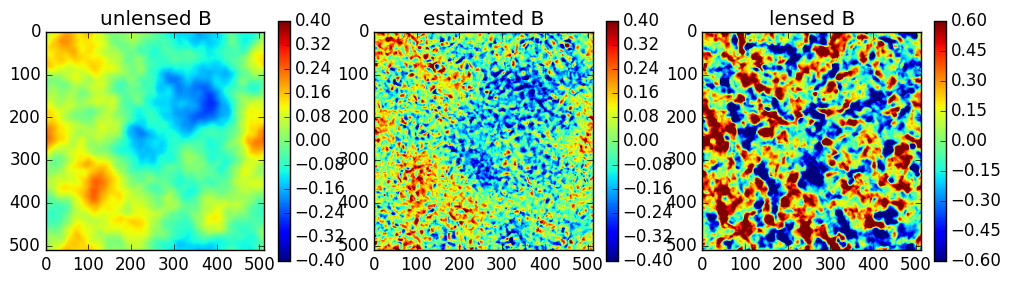

In [43]:
figure(figsize = (12, 3))
subplot(1,3,1)
imshow(Bx); title("unlensed B"); clim(-0.4, 0.4); colorbar(); 
subplot(1,3,2)
imshow(ifft2r(est_B)); title("estaimted B"); clim(-0.4, 0.4); colorbar(); 
subplot(1,3,3)
imshow(tldBx); title("lensed B"); clim(-0.6, 0.6); colorbar();

### Since we are looking at total power in the estimate, we are looking at signal variance, estimation noise variance and bias. 

To probe the different components, lets try and run the same algorithm with no B-mode...


### The estimates are extremely sensitive to l_max of E and B?? 
This has happened to me before when I didn't periodically wrap the lensing correctly... which resulted in a 
edge discontinuity that resulted in a Gibbs phenomenon that corrupted the high frequency terms. However, I can't detect 
such a discontinuity in Blakes method??

# Topic 4: How to Investigate the approx det(lensing linear mat) = 1

# Topic 5: Can we incorporate an estimate of r in this MLE problem?

# Topic 6: How to incorporate noise to use for real data.